# Normal Distribution

Bootstrap resampling creates a [normal distribution](https://www.geeksforgeeks.org/python-normal-distribution-in-statistics/). With this distribution, we can calculate the probability under the curve. This probability would estimate the true population for prop betting. This notebook is an extension to bootstrap resampling.

The data used is stored in a NFL database but, it is not updated to the latest game statistics (in progress). This should be enough for the purpose of analysis.

In [1]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Local data location
path = fr"C:\Users\kazir\Desktop\Projects\nerdy_pick\db\nfl_data\nfl_off_stat.csv"
off_data = pd.read_csv(path, index_col=False)

In [3]:
def data_info(player_name: str, stat_type: str, filter_data: bool = False):
    data_array = off_data[off_data["Name"] == player_name][f"{stat_type} Yds"]
    sample_size = len(data_array)
    sample_avg = data_array.mean()
    sample_std = data_array.std()
    
    if filter_data:
        print("Filtered data points 2 standard deviation from the mean")
        data_array = data_array[
            (data_array >= sample_avg - sample_std * 2) &
            (data_array <= sample_avg + sample_std * 2)
        ]
        sample_size = len(data_array)
        sample_avg = data_array.mean()
        sample_std = data_array.std()

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

    sns.histplot(data_array, ax=ax[0], kde=True)
    ax[0].axvline(x=sample_avg, c="g")
    ax[0].set_title(f"Sample Histogram ({player_name})")
    ax[0].set_xlabel(f"{stat_type} Yards")

    iter = 1000
    bootstrap_array = np.zeros(iter)

    for idx in range(iter):
        bootstrap_array[idx] = np.random.choice(a=data_array, size=sample_size, replace=True).mean()
    
    sns.histplot(bootstrap_array, ax=ax[1], kde=True)
    ax[1].set_title(f"Bootstrapped Sample Data ({player_name})")
    ax[1].axvline(x=bootstrap_array.mean(), c="r")
    ax[1].set_xlabel(f"{stat_type} Yards")

    bs_avg = bootstrap_array.mean()
    bs_std = bootstrap_array.std()
    print(f"Sample Size: {sample_size}, Sample ST.D: {round(sample_std, 2)}, Sample Avg: {round(sample_avg, 2)}")
    return fig, sample_size, sample_avg, sample_std, bs_avg, bs_std, data_array, bootstrap_array

I attempted to use [Zay Flowers](https://www.espn.com/nfl/player/gamelog/_/id/4429615/zay-flowers) to perform analysis on his receiving yards. 

Sample Size: 29, Sample ST.D: 37.61, Sample Avg: 60.03


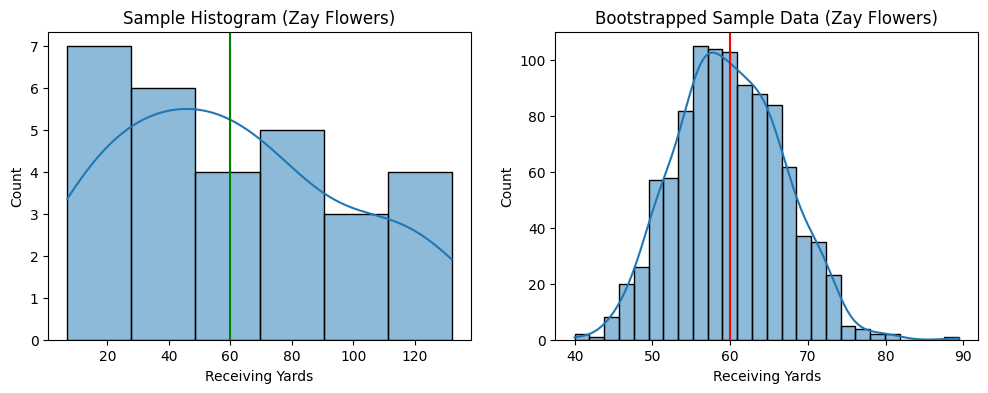

In [4]:
fig, sample_size, sample_avg, sample_std, bs_avg, bs_std, sample_data, bs_data = data_info("Zay Flowers", stat_type="Receiving")

Filtered data points 2 standard deviation from the mean
Sample Size: 29, Sample ST.D: 37.61, Sample Avg: 60.03


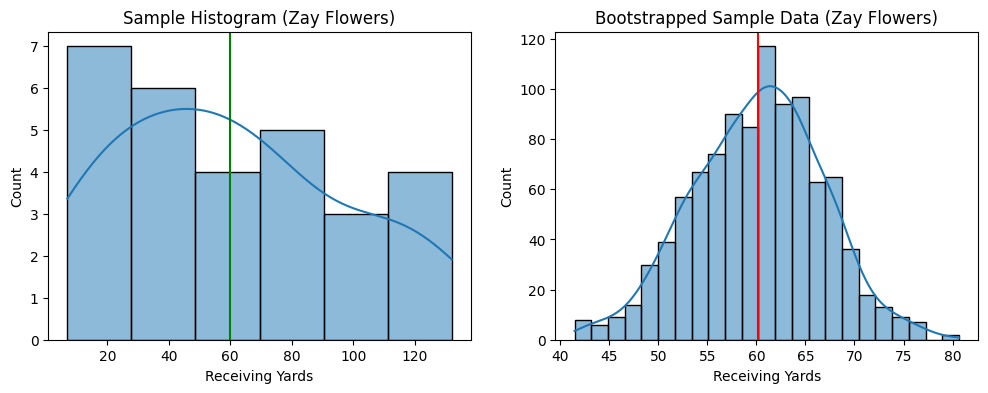

In [5]:
fig, sample_size, sample_avg, sample_std, bs_avg, bs_std, sample_data, bs_data = data_info("Zay Flowers", stat_type="Receiving", filter_data=True)

Lets use [Rashod Bateman](https://www.espn.com/nfl/player/gamelog/_/id/4360939/rashod-bateman) instead.

Sample Size: 46, Sample ST.D: 27.99, Sample Avg: 37.8
Z-Score: -0.010874923989713814
The probability Rashod Bateman has under 37.5 rec yards using the sample histogram is 49.57%


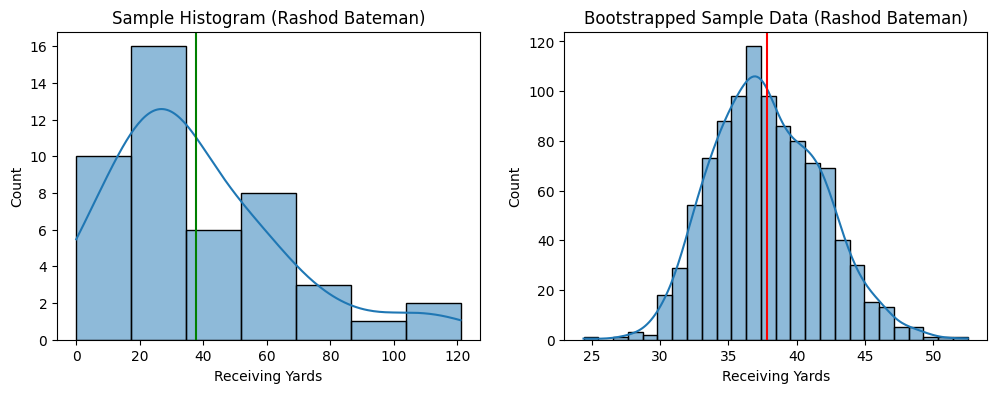

In [6]:
fig, sample_size, sample_avg, sample_std, bs_avg, bs_std, sample_data, bs_data = data_info("Rashod Bateman", "Receiving")
z_score = (37.5-sample_avg)/sample_std
print(f"Z-Score: {z_score}")
print(f"The probability Rashod Bateman has under {37.5} rec yards using the sample histogram is {round(norm.cdf(z_score)*100, 2)}%")

Filtered data points 2 standard deviation from the mean
Sample Size: 43, Sample ST.D: 20.72, Sample Avg: 32.72
Z-Score: 0.2306291204093486
The probability Rashod Bateman has under 37.5 rec yards using the sample histogram is 59.12%


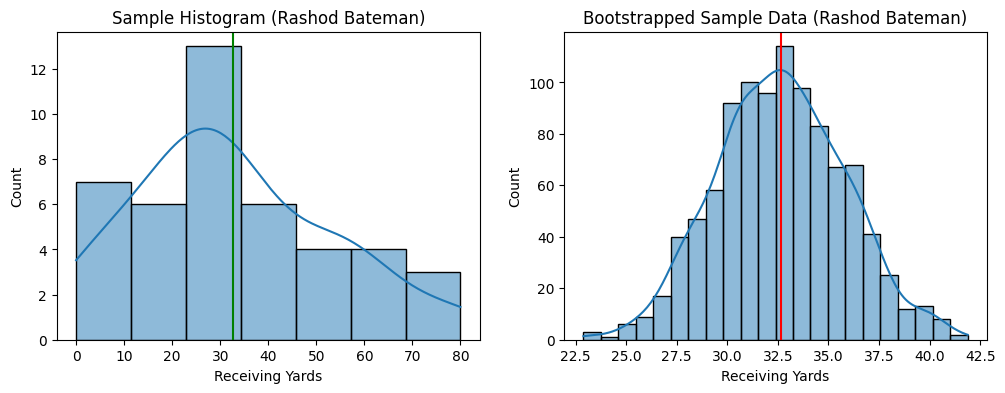

In [7]:
# Filter data to less than 2 standard deviation away from the mean
fig, sample_size, sample_avg, sample_std, bs_avg, bs_std, sample_data, bs_data = data_info("Rashod Bateman", "Receiving", True)
z_score = (37.5-sample_avg)/sample_std
print(f"Z-Score: {z_score}")
print(f"The probability Rashod Bateman has under {37.5} rec yards using the sample histogram is {round(norm.cdf(z_score)*100, 2)}%")

Analysis on [J.K. Dobbins](https://www.espn.com/nfl/player/_/id/4241985/jk-dobbins) rushing yards.

Sample Size: 37, Sample ST.D: 38.65, Sample Avg: 60.0
Z-Score: -0.37518127731838724
The probability J.K. Dobbins is over 45.5 rec yards using the sample histogram is 64.62%


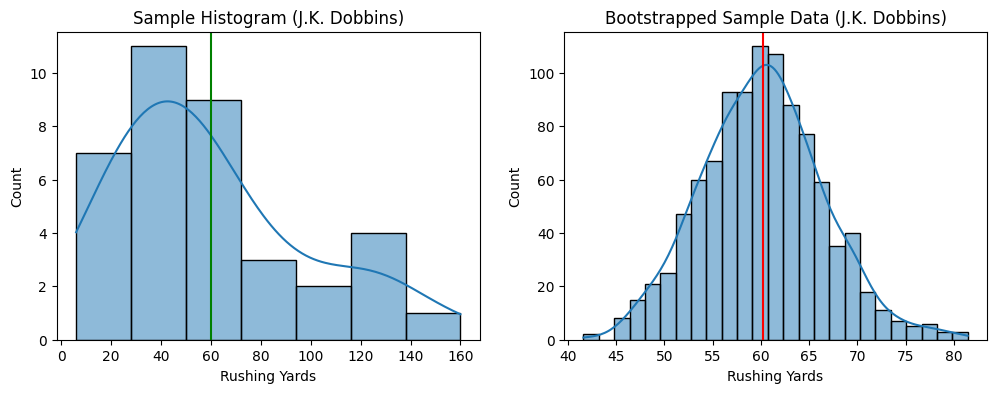

In [8]:
fig, sample_size, sample_avg, sample_std, bs_avg, bs_std, sample_data, bs_data = data_info("J.K. Dobbins", "Rushing")
z_score = (45.5-sample_avg)/sample_std
print(f"Z-Score: {z_score}")
print(f"The probability J.K. Dobbins is over {45.5} rec yards using the sample histogram is {round(100-norm.cdf(z_score)*100, 2)}%")